In [35]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Reading in the data
df_cleveland = pd.read_csv("/Users/mani/Desktop/heart-disease-predictor/data/cleveland_data.csv", index_col=0)

In [6]:
df_cleveland.head()

,age,sex,cp,trest,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [7]:
df_cleveland.dropna(inplace=True)

In [8]:
# Importing the k means clustering class
from sklearn.cluster import KMeans

def find_optimal_k(data, num_clusters):
    """
    Creates a graph of the cumulative distortion of a k-means clustering model as a function of the number of clusters
    param data: A dataframe or numpy array with features
    param num_clusters: An integer that specifies the number of clusters that will be shown in the graph
    return: Uses plt.show() to display the graph
    """
    # For storing the distortion, the sum of squared distances of samples to their closest cluster center, for each iterations
    distortions = []
    
    # Trying different values for k, between 1 and num_clusters
    for k in range(1, num_clusters):
        # Defining a k means model with the value of k for the iteration and with 100 iterations max
        kmeans = KMeans(n_clusters=k, 
                        max_iter=100)
    
        # Fitting the k means model to the dimensionality reduced customer data
        kmeans.fit(data)
    
        # Appending the distortion value to the list
        distortions.append(kmeans.inertia_)
        
    # Creating a graph of the cumulative distortion as a function of the number of components
    plt.plot(distortions)
    # Adding a title
    plt.title("Distortion vs The Number of Clusters")
    # Adding a label for the x-axis
    plt.xlabel("Number of Clusters")
    # Adding a label for the y-axis
    plt.ylabel("Distortion")
    
    # Displaying the graph
    plt.show()

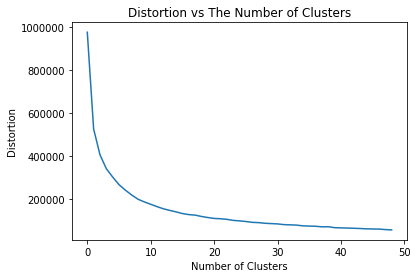

In [9]:
# Creating an elbow plot
find_optimal_k(df_cleveland, 50)


In [10]:
# Normalizing the data to help decrease the cumulative distortion

# Getting only the numerical column so that they can be scaled
num_cols = ["age", "trest", "chol", "thalach", "oldpeak", "ca"]

# Importing the scalar
from sklearn.preprocessing import MinMaxScaler

# Create the scalar object
scaler = MinMaxScaler()

# Scale the numerical columns into a 0 to 1 range
df_cleveland[num_cols]= scaler.fit_transform(df_cleveland[num_cols])

In [11]:
df_cleveland.head()

,age,sex,cp,trest,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,0.708333,1.0,1.0,0.481132,0.367698,1.0,2.0,0.603053,0.0,0.370968,3.0,0.000000,6.0,0
1,0.791667,1.0,4.0,0.622642,0.549828,0.0,2.0,0.282443,1.0,0.241935,2.0,1.000000,3.0,1
2,0.791667,1.0,4.0,0.245283,0.353952,0.0,2.0,0.442748,1.0,0.419355,2.0,0.666667,7.0,1
3,0.166667,1.0,3.0,0.339623,0.426117,0.0,0.0,0.885496,0.0,0.564516,3.0,0.000000,3.0,0
4,0.250000,0.0,2.0,0.339623,0.268041,0.0,2.0,0.770992,0.0,0.225806,1.0,0.000000,3.0,0


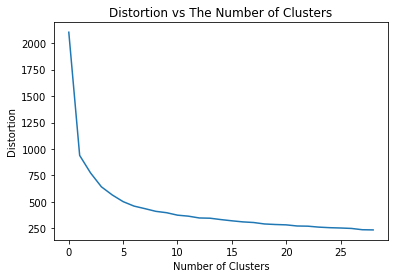

In [12]:
find_optimal_k(df_cleveland, 30)

In [13]:
def create_variance_plot(explained_var_ratio, num_components):
    """
    Creates a graph that shows the explained variance as a function of the number of principal components
    param explained_var_ratio: A list that holds the explained variance ratio for each component
    param num_components: An integer that specifies that number of components to display in the graph
    return: Use plt.show() to display the graph
    """
    # Getting an array of the cumulative sum of explained variance ratios in order to visualize the number of components needed
    explained_var_cumulative = np.cumsum(explained_var_ratio)
    
    # Creating the x-axis for the plot of the explained variance over the number of components plot
    x_axis = [*range(1, len(explained_var_cumulative)+1)]
    
    # Creating the plot for the explained variance over the number of components plot
    plt.plot(x_axis[:num_components], explained_var_cumulative[:num_components])
    # Adding a title
    plt.title("Explained Variance vs Number of Principal Components")
    # Adding the x-axis label
    plt.xlabel("Number of Principal Components")
    # Adding the y-axis label
    plt.ylabel("Cumulative Variance")
    
    # Displaying the graph
    plt.show()
    
    return explained_var_cumulative

In [14]:
# Creating a subset that does not include the response variable
df_features = df_cleveland.loc[:, df_cleveland.columns != "num"]

In [15]:
df_features.shape

(296, 13)

In [16]:
# Importing the PCA class
from sklearn.decomposition import PCA

# Creating the PCA model
pca = PCA(n_components=13)

# Fitting the PCA model
pca.fit(df_features)

PCA(n_components=13)

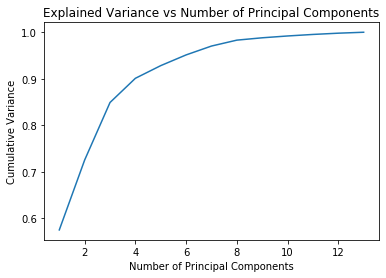

array([0.57502288, 0.72528689, 0.84897977, 0.90099191, 0.92823867,
       0.95127037, 0.9703124 , 0.98302267, 0.98806396, 0.99197574,
       0.99527958, 0.99797186, 1.        ])

In [17]:
# Creating an elbow graph for the explained variance of the features
create_variance_plot(pca.explained_variance_ratio_, 13)

In [18]:
# Creating a PCA model with six principal components
pca_6 = PCA(n_components=6)

# Creating the dimensionality reduced dataframe
df_reduced = pca_6.fit_transform(df_features)

In [20]:
df_reduced = pd.DataFrame(df_reduced)

In [21]:
df_reduced.head()

,0,1,2,3,4,5
0,1.032583,-0.125748,2.616309,1.334864,0.026616,-0.326670
1,-1.324771,-1.592034,-0.721503,0.411858,-0.703146,0.201008
2,2.533553,-1.123698,-0.084100,0.079868,-0.266961,0.228013
3,-1.587461,0.649819,-0.467207,1.534991,-0.399580,-0.767666
4,-2.021076,-0.540295,1.160132,-0.393753,0.492703,0.305994


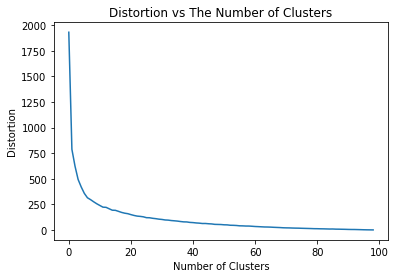

In [26]:
# Creating an elbow graph for the k means distortion for the reduced data
find_optimal_k(df_reduced, 100)

In [27]:
# Creating a kmeans clustering model with 10 clusters
k_means = KMeans(n_clusters=10)

# Training the kmeans model with the reduced data
k_means.fit(df_reduced)

KMeans(n_clusters=10)

In [28]:
# Getting the cluster centroids
cluster_centroids = k_means.cluster_centers_

In [32]:
cluster_centroids = pd.DataFrame(cluster_centroids)
cluster_centroids.head()

,0,1,2,3,4,5
0,-2.005503,1.291877,0.545040,0.045930,-0.021187,0.090749
1,2.276141,0.836451,-0.664158,0.070809,-0.083762,-0.004578
2,-1.469300,-1.389443,-0.483184,0.443402,-0.280374,-0.036454
3,2.271518,-0.971561,0.101048,-0.082906,0.063016,0.009807
4,-1.728940,-1.075112,-0.012163,-0.512983,0.222261,-0.070092


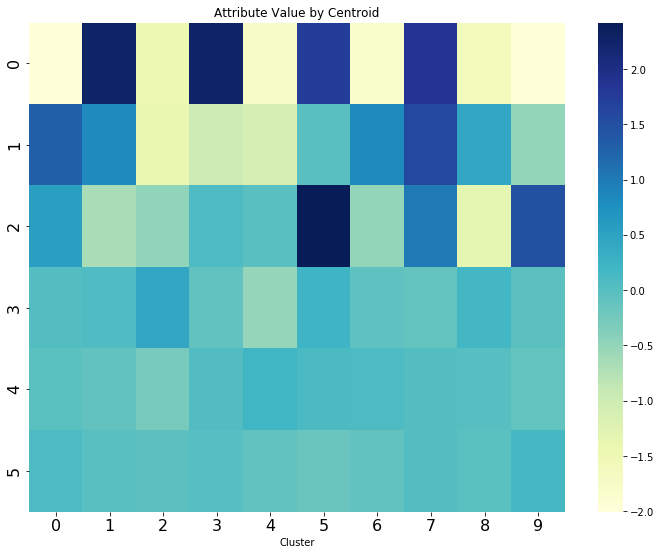

In [36]:
# Creating a heat map in order to visualize the clusters
plt.figure(figsize = (12,9))
ax = sns.heatmap(cluster_centroids.T, cmap = 'YlGnBu')
ax.set_xlabel("Cluster")
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 16)
ax.set_title("Attribute Value by Centroid")
plt.show()

In [38]:
def display_component(v, features_list, component_num, n_weights=10):
    
    # get index of component (last row - component_num)
    row_idx = N_COMPONENTS-component_num

    # get the list of weights from a row in v, dataframe
    v_1_row = v.iloc[:, row_idx]
    v_1 = np.squeeze(v_1_row.values)

    # match weights to features in counties_scaled dataframe, using list comporehension
    comps = pd.DataFrame(list(zip(v_1, features_list)), 
                         columns=['weights', 'features'])

    # we'll want to sort by the largest n_weights
    # weights can be neg/pos and we'll sort by magnitude
    comps['abs_weights']=comps['weights'].apply(lambda x: np.abs(x))
    sorted_weight_data = comps.sort_values('abs_weights', ascending=False).head(n_weights)

    # display using seaborn
    ax=plt.subplots(figsize=(10,6))
    ax=sns.barplot(data=sorted_weight_data, 
                   x="weights", 
                   y="features", 
                   palette="Blues_d")
    ax.set_title("PCA Component Makeup, Component #" + str(component_num))
    plt.show()

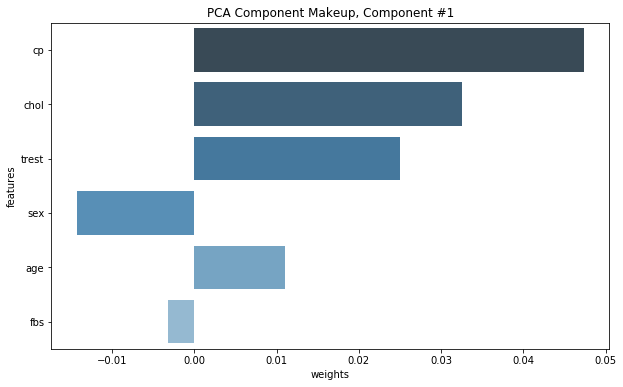

In [43]:
# Displaying a graph that shows the makeup of component 0
N_COMPONENTS = 6
# Transforming v into a pandas dataframe
v = pd.DataFrame(pca_6.components_)
display_component(v, df_cleveland.columns, 1, n_weights=13)

In [44]:
df_cleveland.head()

,age,sex,cp,trest,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,0.708333,1.0,1.0,0.481132,0.367698,1.0,2.0,0.603053,0.0,0.370968,3.0,0.000000,6.0,0
1,0.791667,1.0,4.0,0.622642,0.549828,0.0,2.0,0.282443,1.0,0.241935,2.0,1.000000,3.0,1
2,0.791667,1.0,4.0,0.245283,0.353952,0.0,2.0,0.442748,1.0,0.419355,2.0,0.666667,7.0,1
3,0.166667,1.0,3.0,0.339623,0.426117,0.0,0.0,0.885496,0.0,0.564516,3.0,0.000000,3.0,0
4,0.250000,0.0,2.0,0.339623,0.268041,0.0,2.0,0.770992,0.0,0.225806,1.0,0.000000,3.0,0


In [45]:
# Reducing the dimensionality of the data with the response variable included

# Creating the PCA model
pca = PCA(n_components=14)

# Fitting the PCA model
pca.fit(df_cleveland)

PCA(n_components=14)

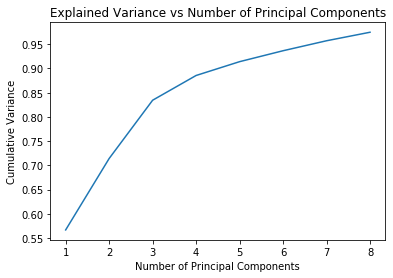

array([0.56677829, 0.71418519, 0.83449201, 0.88558451, 0.91409318,
       0.936662  , 0.9572498 , 0.97482694, 0.9836974 , 0.98854014,
       0.99230226, 0.9954881 , 0.99807332, 1.        ])

In [47]:
create_variance_plot(pca.explained_variance_ratio_, 8)